<a href="https://colab.research.google.com/github/bagusakhlaq/RevoU-DAMC-Case-Study/blob/main/Case-Study-2/revou_cs3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Case Study 3: Games Sales
# **RevoU DAMC**
---

## **Introduction**
> **Case Study Instructions:** <br>
> 1.	You have to provide your answer in slides. We’d like to point out that how you present the answer matters to us.
2.	Answer the questions and problems below to the best of your ability.
3.	You may use any outside resources necessary to help in your answer.
4.	You may use Python, Data Studio, or any other tool you wish. Please provide the codes used to produce the answers
5.	Please use the following tools to answer the questions: 1) Google slide for the presentation; 2) Google sheet for any spreadsheet and calculation instead of microsoft excel.
>
> Gaming industry is an interesting field to explore, it would be fun knowing who is the most popular publishers and developers and which games are the most popular. <br>
> Content data: 
> * Name: Name of the game 
> * Sales: Sales of the game in Millions
> * Series: Series of the game
> * Release: Release date of the game
> * Genre: Genre of the game 
> * Developer: Developer of the game 
> * Publisher: Publisher of the game
> 



## 1. Ask


### 1.1 Business Objectives
* Which game is the oldest  and the newest games in that dataset?
* Which publisher published most of the games ?
* Which developer developed most of the games ?
* Which series is the most sales ?
* Which series have the most games ?


### 1.2 Business Tasks
Find the most popular publishers and developers and which games are the most popular.

## 2. Prepare


### 2.1 Work Steps
The dataset was provided by RevoU in their google sheet. To obtain the dataset, I copied the spreadsheet into my Google drive folder. First thing I did was preparing all Python libraries required for the analysis by importing them in this notebook. I imported Pandas for processing .csv file into a dataframe and plotting it into a basic visualization and Matplotlib for advanced data visualization. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

After all libraries imported, then I loaded the data into a dataframe using pandas command. Then, I checked the first 5 row of data using head() function in pandas to make sure the data was successfully loaded.

In [3]:
files = "/content/drive/MyDrive/Data Analyst Project/revou-cs3/games_sales.csv"
df = pd.read_csv(files)
df.head(5)

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


Last step, I checked the dataframe and the data types in there using info() function in pandas. There were 7 columns with 177 rows, only sales column had the float64 data type, the rest of columns had object data type. Release column contains release date of the game, and the data type should be in datetime format. Also look at the series column, it only has 141 non-null values out of 177 total rows. It means that there are 36 null values in the series column. I will handle this in the data process step in the next section.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


## 3. Process


### 3.1 Data Cleaning
As mentioned previously, there were 36 null values in the 'series' column. Series column contains of name of the game series, which also contain the game name itself. For example, Diablo was the name of game series Diablo I, II, and III; or The Sims which was the name of game series The Sims 1, 2, and 3. Therefore, I cleaned those null values by replacing them with corresponding game name. 
\
Using pandas, I splitted strings in the 'name' column and defined it as splits array. In s_cl, it only took the first string (which was the first name of the game) from strings that had been splitted in splits array.

In [5]:
splits = df['Name'].str.split()
s_cl = splits.str[0]

df['Series'].fillna(s_cl, inplace = True)

In [12]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,PlayerUnknown's,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Garry's,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Terraria,5/1/2011,Action-adventure,Re-Logic,Re-Logic


Next, 'release' column had object/string data type. To format it into the proper datetime data type, I used the to_datetime().

In [6]:
df['Release'] = pd.to_datetime(df['Release'])

After replacing those nulls and changed the 'release' column data type, I then re-checked the dataframe. The result showing that no null values remained, and the data type was changed successfully. By seeing this information, it also showed that there were not any duplication in the dataframe. Now, the data is ready to analyze.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     177 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB


## 4. Analyze

### 4.1 Oldest and Newest Games

To get the oldest games released, I sorted the release date in ascending order. Thus, the oldest release date would be on top of the dataframe. Then, I set the range of index to show the first ten data in the dataframe.  

In [10]:
# Game release sorted ascending (from oldest)
gr_old = df.sort_values(by='Release', ascending=True)

# Print 10 oldest games
print(gr_old[['Name', 'Release','Series','Publisher']][:10])

                                       Name    Release                Series  \
133                                 Hydlide 1984-12-01               Hydlide   
34   Where in the World Is Carmen Sandiego? 1985-06-01       Carmen Sandiego   
88                     International Karate 1985-11-01  International Karate   
162                                  Tetris 1988-01-01                Tetris   
22                             Last Ninja 2 1988-08-01        The Last Ninja   
151                                 RoboCop 1988-12-01               RoboCop   
30                                 Populous 1989-06-01              Populous   
150                          Return to Zork 1993-08-01                  Zork   
51                                     Myst 1993-09-01                  Myst   
156                Star Wars: Rebel Assault 1993-11-01             Star Wars   

                                 Publisher  
133  Technology and Entertainment Software  
34                           

As mentioned previously, gr_old variable sorted the dataframe by release column in ascending order. Which the oldest games were on top, and the newest games were on the last order in the dataframe. To get the newest games released, I reversed the range of index using negative stop value to extract last 10<sup>th</sup> data in the dataframe and negative step value to decrement one step. 

In [11]:
# Print 10 newest games
print(gr_old[['Name', 'Release','Series','Publisher']][:-10:-1])

                          Name    Release          Series  \
20                     Valheim 2021-02-01         Valheim   
27              Cyberpunk 2077 2020-12-01       Cyberpunk   
110         Crusader Kings III 2020-09-01  Crusader Kings   
10                   Fall Guys 2020-08-01            Fall   
139                    Mordhau 2019-04-01         Mordhau   
92                Satisfactory 2019-03-01    Satisfactory   
26                  The Forest 2018-04-01             The   
13                        Rust 2018-02-01            Rust   
96   Kingdom Come: Deliverance 2018-02-01         Kingdom   

                   Publisher  
20   Coffee Stain Publishing  
27                CD Projekt  
110      Paradox Interactive  
10          Devolver Digital  
139               Triternion  
92   Coffee Stain Publishing  
26            Endnight Games  
13         Facepunch Studios  
96          Warhorse Studios  


### 4.2 Most Productive Developers and Publishers

I counted rows of records in the developer and publisher column and grouped it into distinct string in their own column. After that, I extracted the top 5 developers and publishers using .nlargest() function. Then, plot them into a horizontal bar chart.

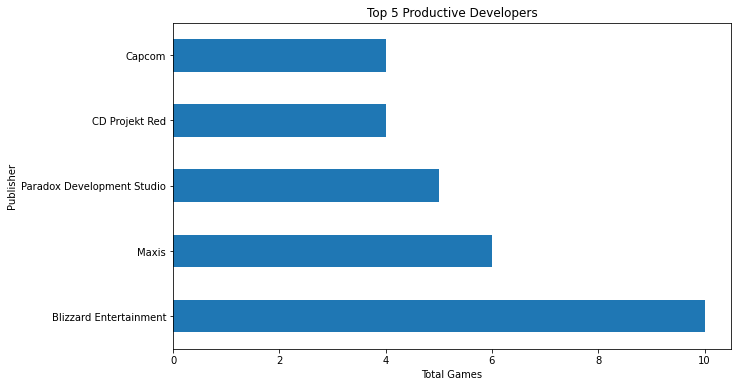

In [13]:
# Count how many records are in developers column, group by itself
dev = df.groupby(['Developer'])['Developer'].count()

# Top N using .nlargest() in Pandas
top5_dev = dev.nlargest(5)

# Plot the top N into the horizontal bar chart in Pandas
dev_g = top5_dev.plot(kind='barh', figsize=(10, 6))
plt.title("Top 5 Productive Developers")
plt.xlabel("Total Games")
plt.ylabel("Publisher")
plt.show()

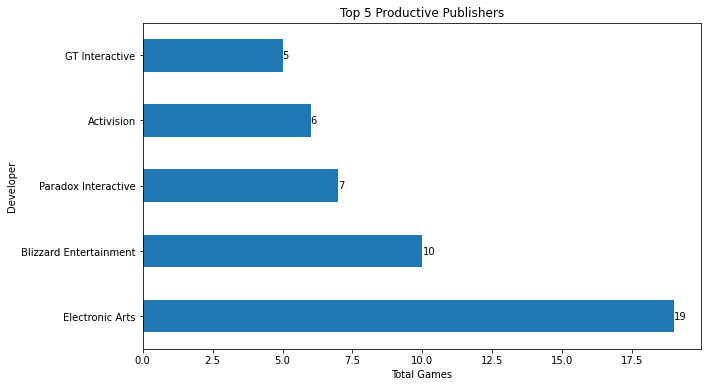

In [14]:
# Count how many records are in publisher column, group by itself
pub = df.groupby(['Publisher'])['Publisher'].count()

# Top N using .nlargest() in Pandas
top5_pub = pub.nlargest(5)

# Plot the top N into a horizontal bar chart in Pandas
pub_g = top5_pub.plot(kind='barh', figsize=(10, 6))

# Show the value label using .bar_label() in Matplotlib
plt.title("Top 5 Productive Publishers")
plt.xlabel("Total Games")
plt.ylabel("Developer")
pub_g.bar_label(pub_g.containers[0])
plt.show()

### 4.3 Game Series and Sales


I did the same step as previously to perform top 5 series with the most games. I counted rows of records in series column, then grouped it into distinct string in its column. I took the top 5 series using .nlargest() function, then plot it into a horizontal bar chart.

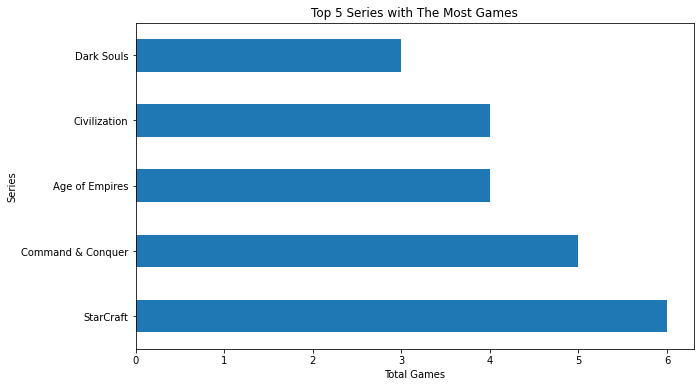

In [17]:
# Make a raw dataframe to exclude null or NaN values in series column aggregation
raw = pd.read_csv(files)

# Count how many records are in series column, group by itself
sg = raw.groupby(['Series'])['Series'].count()

# Top N using .nlargest() in Pandas
top5_sg = sg.nlargest(5)

# Plot the top N into a horizontal bar in Pandas
sg_bar = top5_sg.plot(kind='barh', figsize=(10, 6))

plt.title("Top 5 Series with The Most Games")
plt.xlabel("Total Games")
plt.ylabel("Series")
plt.show()

Sales analysis also used the same steps as previously, but I summed the sales value and grouped it into distinct series.

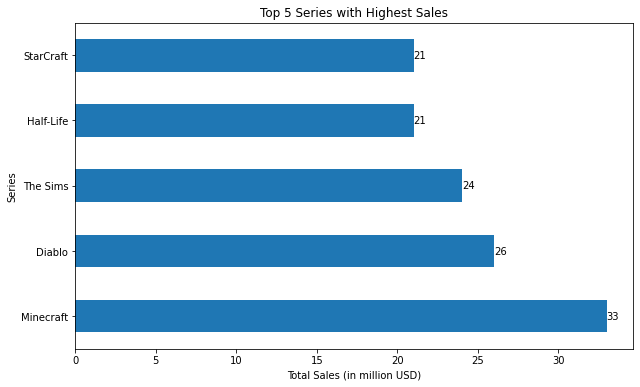

In [18]:
# Calculate total sales group by series
s_sales = raw.groupby(['Series'])['Sales'].sum()

# Sort the top N in series sales
top5_sales = s_sales.nlargest(5)

# Plot the top N sales into a bar chart
sales_g = top5_sales.plot(kind='barh', figsize=(10, 6))
plt.title("Top 5 Series with Highest Sales")
plt.xlabel("Total Sales (in million USD)")
plt.ylabel("Series")
sales_g.bar_label(sales_g.containers[0])
plt.show()

## Share
All findings in this analysis will be presented in a slide or powerpoint file as requested by the stakeholder. 

## Act
* Which game is the oldest and the newest games in that dataset? <br> 
Hydlide was the oldest game (published in December 1<sup>st</sup> , 1984) and Valeheim was the newest game (published in February 1<sup>st</sup> , 2021).

* Which publisher published most of the games? <br>
Top 5 publishers with the most games published were Electronic Arts (19 games), Blizzard Entertainment (10 games), Paradox Interactive (7 games), Activision (6 games), and GT Interactive (5 games).

* Which developer developed most of the games? <br>
Top 5 developers with the most games developed were Blizzard Entertainment (10 games), Maxis (6 games), Paradox Development Studio (5 games), CD Projekt Red (4 games), and Capcom (4 games).

* Which series is the most sales? <br>
Top 5 Series with the highest sales were Minecraft (33 million USD), Diablo (26 million USD), The Sims (24 million USD), Half-Life (21 million USD), and StarCraft (21 million USD). 

* Which series have the most games? <br> 
Top 5 series with the most games were StarCraft (6 games), Command & Conquer (5 games), Age of Empires (4 games), Civilization (4 games), and Dark Souls (3 games).